In [1]:
import time
import umap
import collections
import numpy as np
import pandas as pd
import scanpy as sc
import MASI as masi
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from batch_entropy_mixing import batch_entropy_mixing_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Human PBMC

In [2]:
data_file   = "Downloads/pbmc_rare_0.003619.h5ad"
adata = sc.read_h5ad(data_file)
adata.obs['cell_type']=adata.obs['final_annotation']
adata.obs['source']='reference'
adata.obs['source'][adata.obs['study']!='Oetjen']='target'
source = adata[adata.obs['study']=='Oetjen']
target = adata[adata.obs['study']!='Oetjen']
collections.Counter(target.obs['cell_type'])

Counter({'CD8+ T cells': 1198,
         'CD4+ T cells': 8487,
         'NKT cells': 2137,
         'NK cells': 2205,
         'CD14+ Monocytes': 5341,
         'CD20+ B cells': 2382,
         'Megakaryocyte progenitors': 51,
         'Plasmacytoid dendritic cells': 132,
         'Monocyte-derived dendritic cells': 264,
         'HSPCs': 28,
         'Plasma cells': 18,
         'CD16+ Monocytes': 85})

Human pancreas

In [30]:
data = pd.read_csv("human_pancreas_data.csv",header=0,index_col=0)
data = data.T
y = pd.read_csv("human_pancreas_data_label.csv",header=0,index_col=0)
y.index = data.index
adata = anndata.AnnData(X=data,obs=y)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata = adata[adata.obs['celltype']!='mast']
adata = adata[adata.obs['celltype']!='macrophage']
adata = adata[adata.obs['celltype']!='epsilon']
adata = adata[adata.obs['celltype']!='schwann']

adata.obs['celltype'][adata.obs['celltype']=='acinar']='Pancreas Acinar'
adata.obs['celltype'][adata.obs['celltype']=='alpha']='Pancreas Alpha'
adata.obs['celltype'][adata.obs['celltype']=='beta']='Pancreas Beta'
adata.obs['celltype'][adata.obs['celltype']=='delta']='Pancreas Delta'
adata.obs['celltype'][adata.obs['celltype']=='ductal']='Pancreas Ductal'
adata.obs['celltype'][adata.obs['celltype']=='endothelial']='Pancreas Endothelial'
adata.obs['celltype'][adata.obs['celltype']=='gamma']='Pancreas Gamma'
adata.obs['celltype'][adata.obs['celltype']=='activated_stellate']='Pancreas Stellate'
adata.obs['celltype'][adata.obs['celltype']=='quiescent_stellate']='Pancreas Stellate'

adata.obs['tech'][adata.obs['tech']=='celseq']='Pancreas CelSeq'
adata.obs['tech'][adata.obs['tech']=='celseq2']='Pancreas CelSeq2'
adata.obs['tech'][adata.obs['tech']=='fluidigmc1']='Pancreas Fluidigm C1'
adata.obs['tech'][adata.obs['tech']=='indrop']='Pancreas inDrop'
adata.obs['tech'][adata.obs['tech']=='smartseq2']='Pancreas SS2'

adata.obs['cell_type']=adata.obs['celltype']
adata.obs['study']=adata.obs['tech']
adata.obs['source']='reference'
adata.obs['source'][adata.obs['study']!='Pancreas inDrop']='target'
source = adata[adata.obs['study']=='Pancreas inDrop']
target = adata[adata.obs['study']!='Pancreas inDrop']
sc.pp.filter_genes(source, min_cells=3)
collections.Counter(target.obs['cell_type'])

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.var` of view, copying.


Counter({'Pancreas Gamma': 359,
         'Pancreas Acinar': 712,
         'Pancreas Alpha': 2306,
         'Pancreas Delta': 405,
         'Pancreas Beta': 1172,
         'Pancreas Ductal': 1039,
         'Pancreas Endothelial': 61,
         'Pancreas Stellate': 200})

Mouse brain

In [15]:
data_file   = "mouse_brain_regions.h5ad"
adata = sc.read_h5ad(data_file)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.obs['source']='reference'
adata.obs['source'][adata.obs['study']!='Rosenberg']='target'
source = adata[adata.obs['study']=='Rosenberg']
target = adata[adata.obs['study']!='Rosenberg']
collections.Counter(target.obs['cell_type'])

Counter({'microglial cell': 15370,
         'macrophage': 3791,
         'astrocyte': 77847,
         'oligodendrocyte': 142694,
         'neuron': 514406,
         'oligodendrocyte precursor cell': 13648,
         'endothelial cell': 54557,
         'brain pericyte': 17504,
         'ependymal cell': 3451,
         'olfactory ensheathing cell': 2031})

Human heart

In [52]:
##https://www.heartcellatlas.org/
h4c_file = "human_heart_atlas.h5ad"
source = sc.read_h5ad(h4c_file)
celltypes = source.obs['cell_type'].values.tolist()

##https://www.heartcellatlas.org/
h4c_file = "global.h5ad"
adata = sc.read_h5ad(h4c_file)
adata.obs['cell_type']=celltypes
#adata = adata[adata.obs['source']=='Nuclei']
print(adata.X.shape)
adata.obs['study']=adata.obs['cell_source']
adata.obs['source']='reference'
adata.obs['source'][adata.obs['study']!='Sanger-Nuclei']='target'
#sc.pp.highly_variable_genes(adata, n_top_genes=10000,flavor='cell_ranger',subset=True,batch_key='study')
source = adata[adata.obs['study']=='Sanger-Nuclei']
target = adata[adata.obs['study']!='Sanger-Nuclei']

(486134, 33538)


In [3]:
#markers = pd.read_csv("ReferenceMarkers/mouse_brain_rosenberg_markers.csv",header=0,index_col=False)
#markers = pd.read_csv("ReferenceMarkers/human_heart_litviňuková_markers_27.csv",header=0,index_col=False)
markers = pd.read_csv("ReferenceMarkers/human_hematopoiesis_oetjen_markers.csv",header=0,index_col=False)
#markers = pd.read_csv("ReferenceMarkers/human_pancreas_baron_markers.csv",header=0,index_col=False)
cell_markers={}
for m in markers.columns:
    cell_markers[m]=markers[m].values.tolist()

In [4]:
marker_list = []
for k, v in cell_markers.items():
    marker_list += v
marker_list = list(set(marker_list))
marker_list = [i for i in marker_list if i in adata.var.index]
len(marker_list)

269

In [13]:
ad = adata[:,marker_list].copy()

##run MASI
##step 1 expression to cell type score
start_time = time.time()
scores, labels = masi.gene2cell(ad=ad,cell_markers=cell_markers,use_weight=True,
                                if_tfidf=True,if_thresh=True,thresh=0.9,
                                use_knn=False,use_umap=False)

##step 2 parallel annotation
#cluster every 50000 cells in each batch
annotation = masi.parallel(scores=scores,labels=labels,batch_size=50000)
annotation = np.array(annotation)
print("--- %s mins ---" % int((time.time() - start_time)/60))

adata.obs['Annotation']=annotation
print(round(adjusted_rand_score(adata[adata.obs['source']!='reference'].obs['cell_type'],
                                np.array(annotation[adata.obs['source']!='reference'])),3))
print(round(f1_score(adata[adata.obs['source']!='reference'].obs['cell_type'],
                     np.array(annotation[adata.obs['source']!='reference']), average='macro'),3))
print(round(accuracy_score(adata[adata.obs['source']!='reference'].obs['cell_type'],
                           np.array(annotation[adata.obs['source']!='reference'])),3))

(31774, 16)
--- 5 mins ---
0.751
0.777
0.864


In [14]:
#Label1 accuracy
labels1 = np.argmax(labels.values,axis=1)
knn_pred = []
for i in labels1:
    knn_pred.append(labels.columns[i])
knn_pred = np.array(knn_pred)
print(round(adjusted_rand_score(adata[adata.obs['source']!='reference'].obs['cell_type'],
                                np.array(knn_pred[adata.obs['source']!='reference'])),3))
print(round(f1_score(adata[adata.obs['source']!='reference'].obs['cell_type'],
                     np.array(knn_pred[adata.obs['source']!='reference']), average='macro'),3))
print(round(accuracy_score(adata[adata.obs['source']!='reference'].obs['cell_type'],
                           np.array(knn_pred[adata.obs['source']!='reference'])),3))

0.707
0.635
0.83


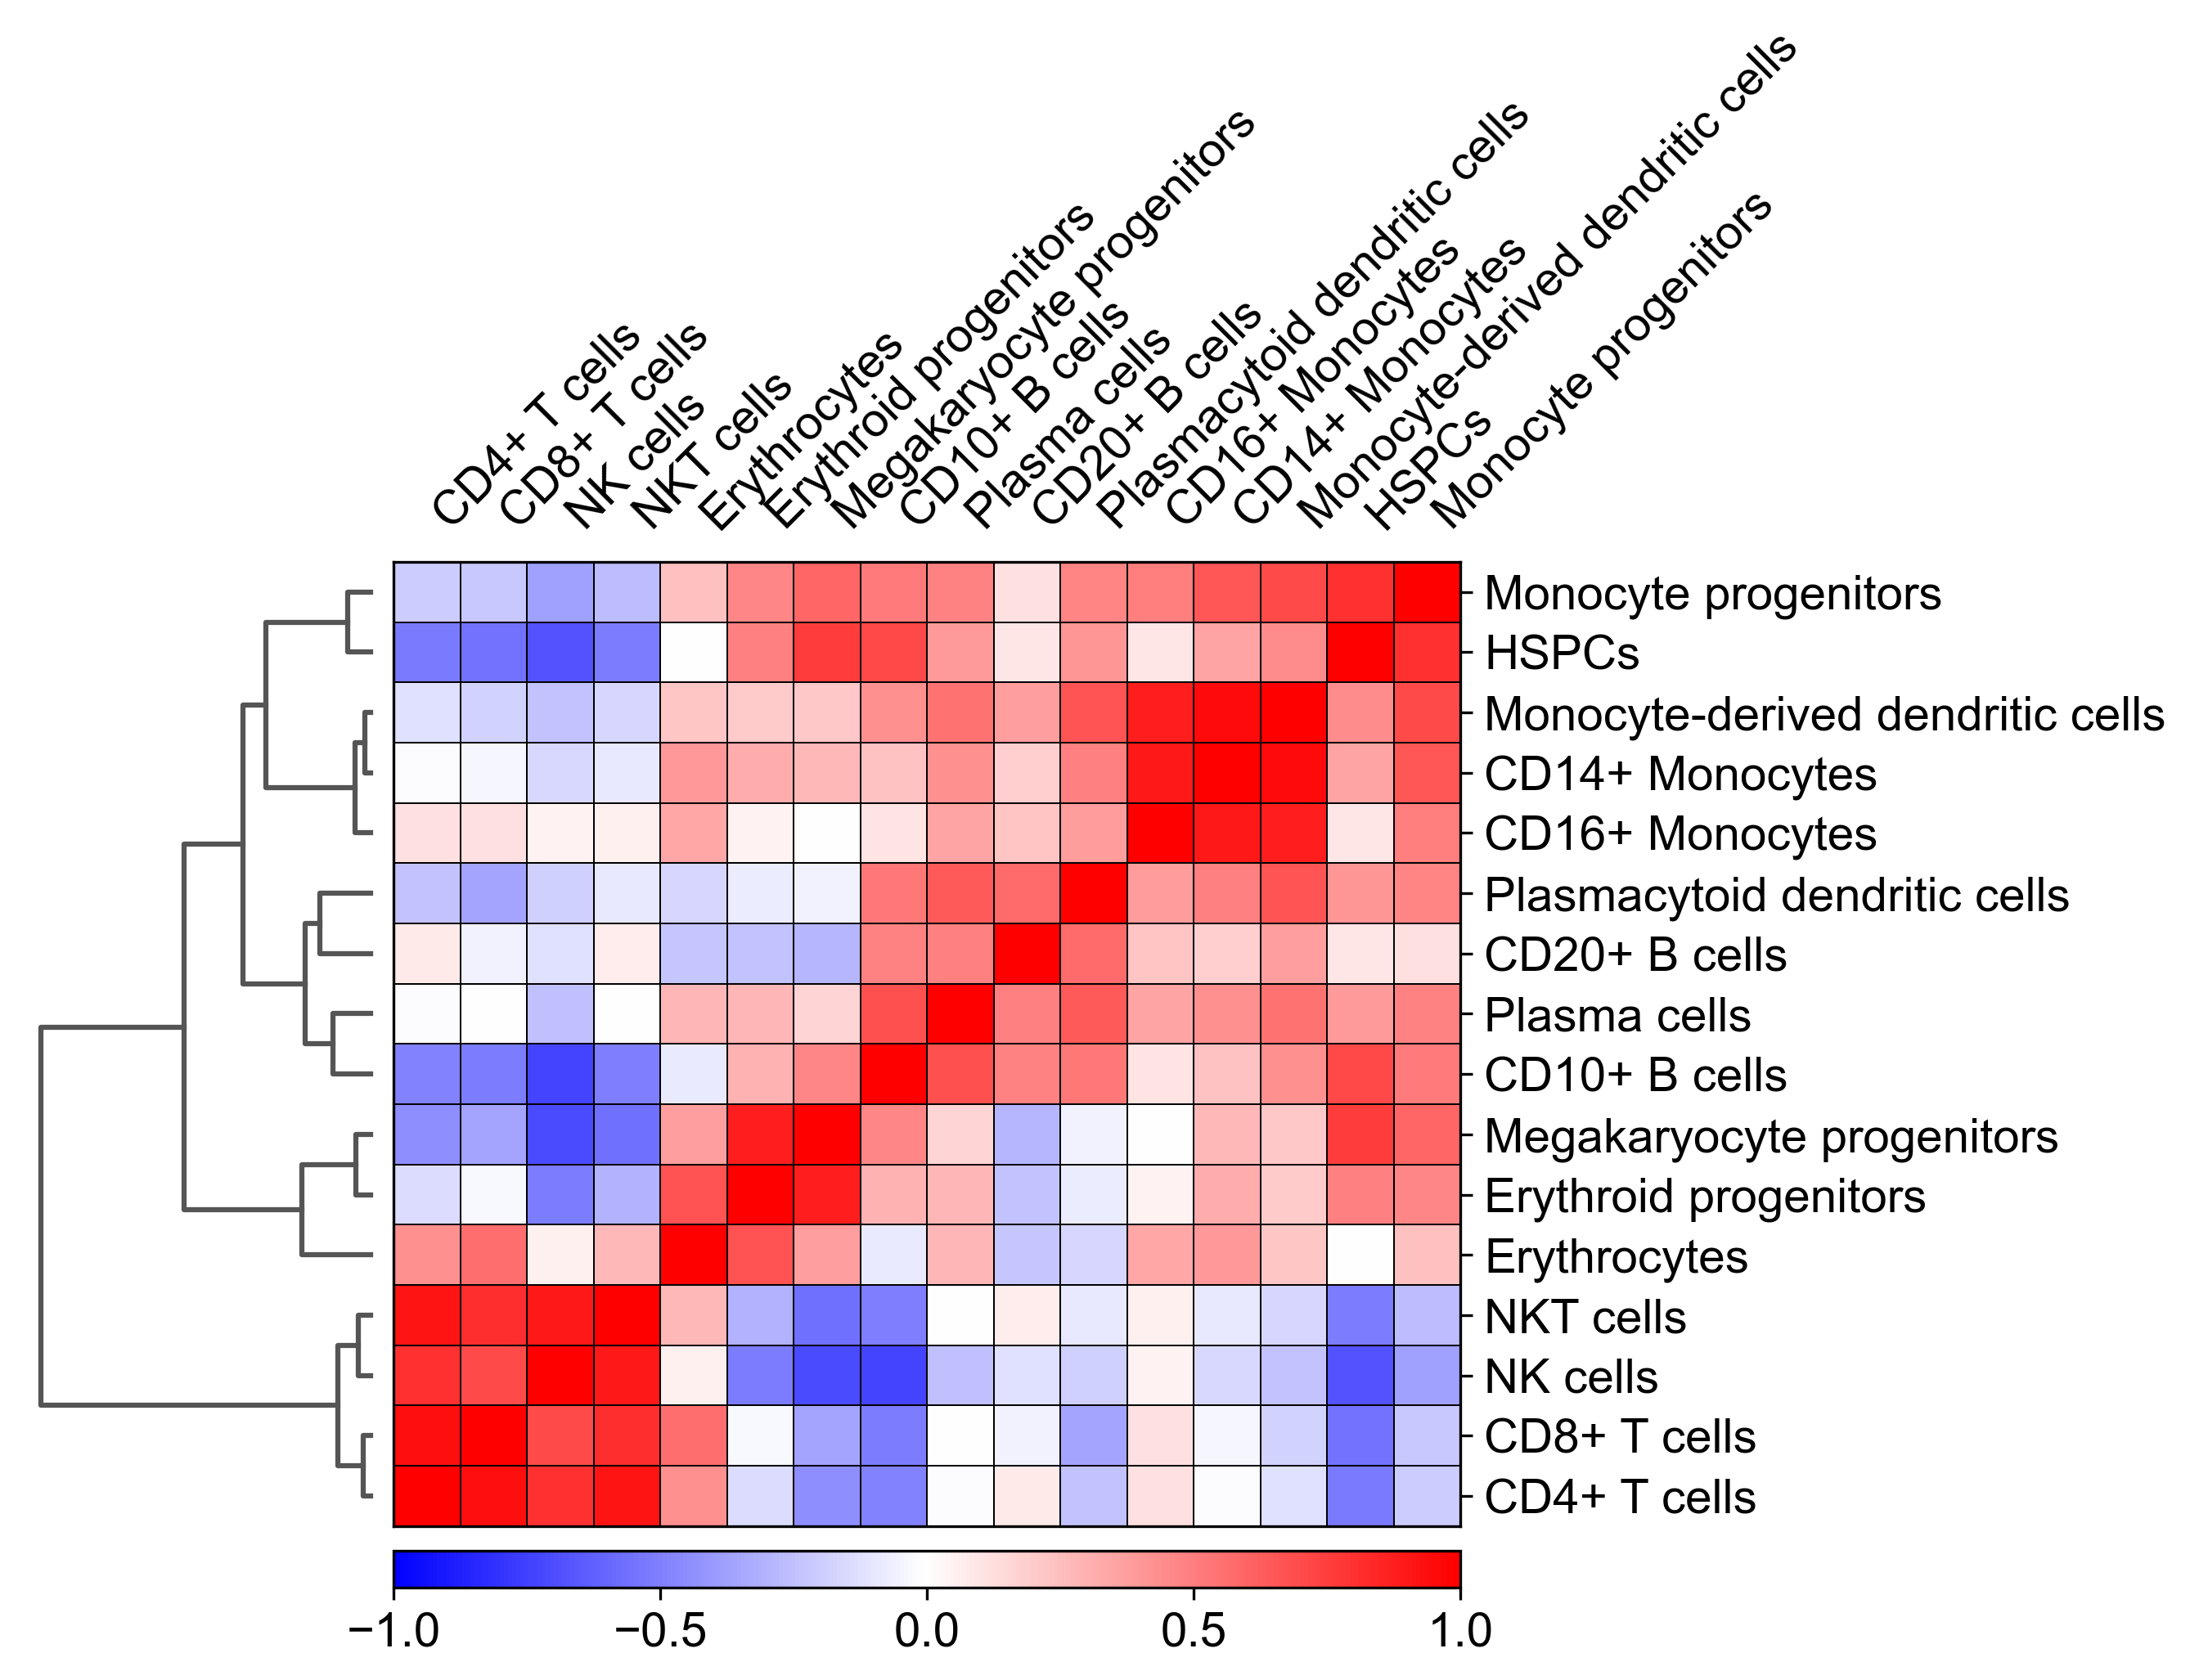

In [15]:
##cell type correlation
adata.obs['Annotation']= pd.Series(adata.obs['cell_type'].values, dtype="category").values
adata.obsm['X_score']=scores.values
sc.tl.dendrogram(adata, 'Annotation', use_rep='X_score',cor_method='spearman', linkage_method='ward')
sc.set_figure_params(scanpy=True, dpi=150, dpi_save=150)
sc.pl.correlation_matrix(adata, 'Annotation', figsize=(7.5,5.5))

In [16]:
umaps = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2,
                  metric="cosine").fit(scores.values)
embedding = umaps.transform(scores.values)

embedding = pd.DataFrame(embedding)
embedding.columns=['UMAP1','UMAP2']
adata.obsm['X_umap'] = embedding.iloc[:,:2].values

In [ ]:
down_samp = pd.DataFrame(scores.values)
down_samp = down_samp.sample(frac=0.25)
umaps = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2,
                  metric="cosine").fit(down_samp.values)
embedding = umaps.transform(scores.values)

embedding = pd.DataFrame(embedding)
embedding.columns=['UMAP1','UMAP2']
adata.obsm['X_umap'] = embedding.iloc[:,:2].values

In [17]:
##cell-type silhouette and batch mixing score
subsample = adata.copy()
#sc.pp.subsample(subsample, fraction=0.1)
print(silhouette_score(subsample.obsm['X_umap'],subsample.obs['cell_type']))
print(batch_entropy_mixing_score(subsample.obsm['X_umap'],subsample.obs['study']))

0.30450717
0.48943623592904073


... storing 'Annotation' as categorical


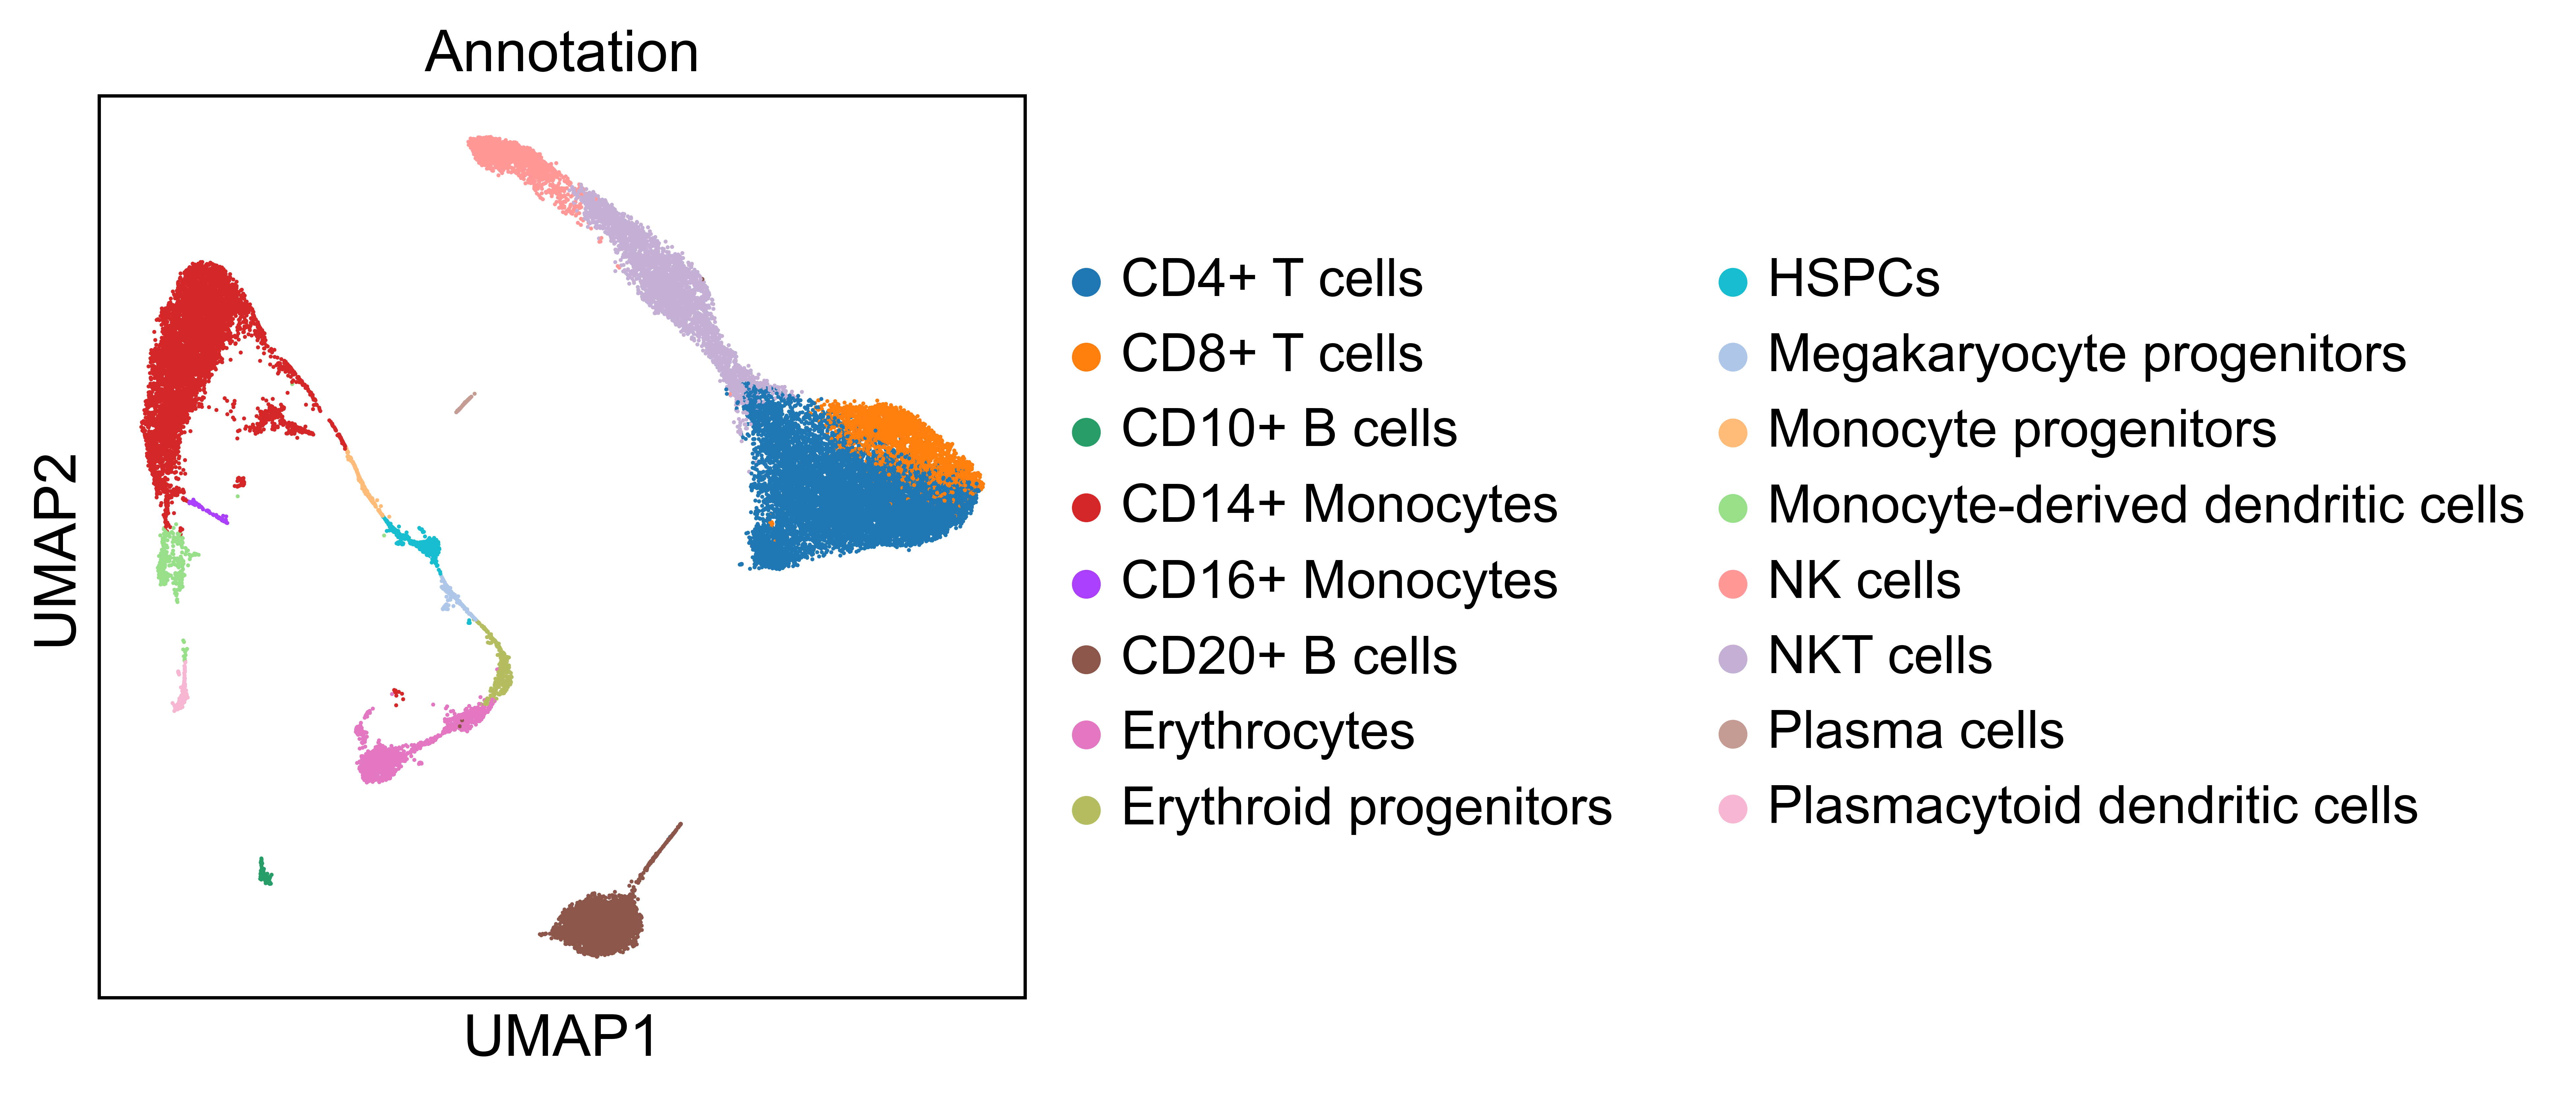

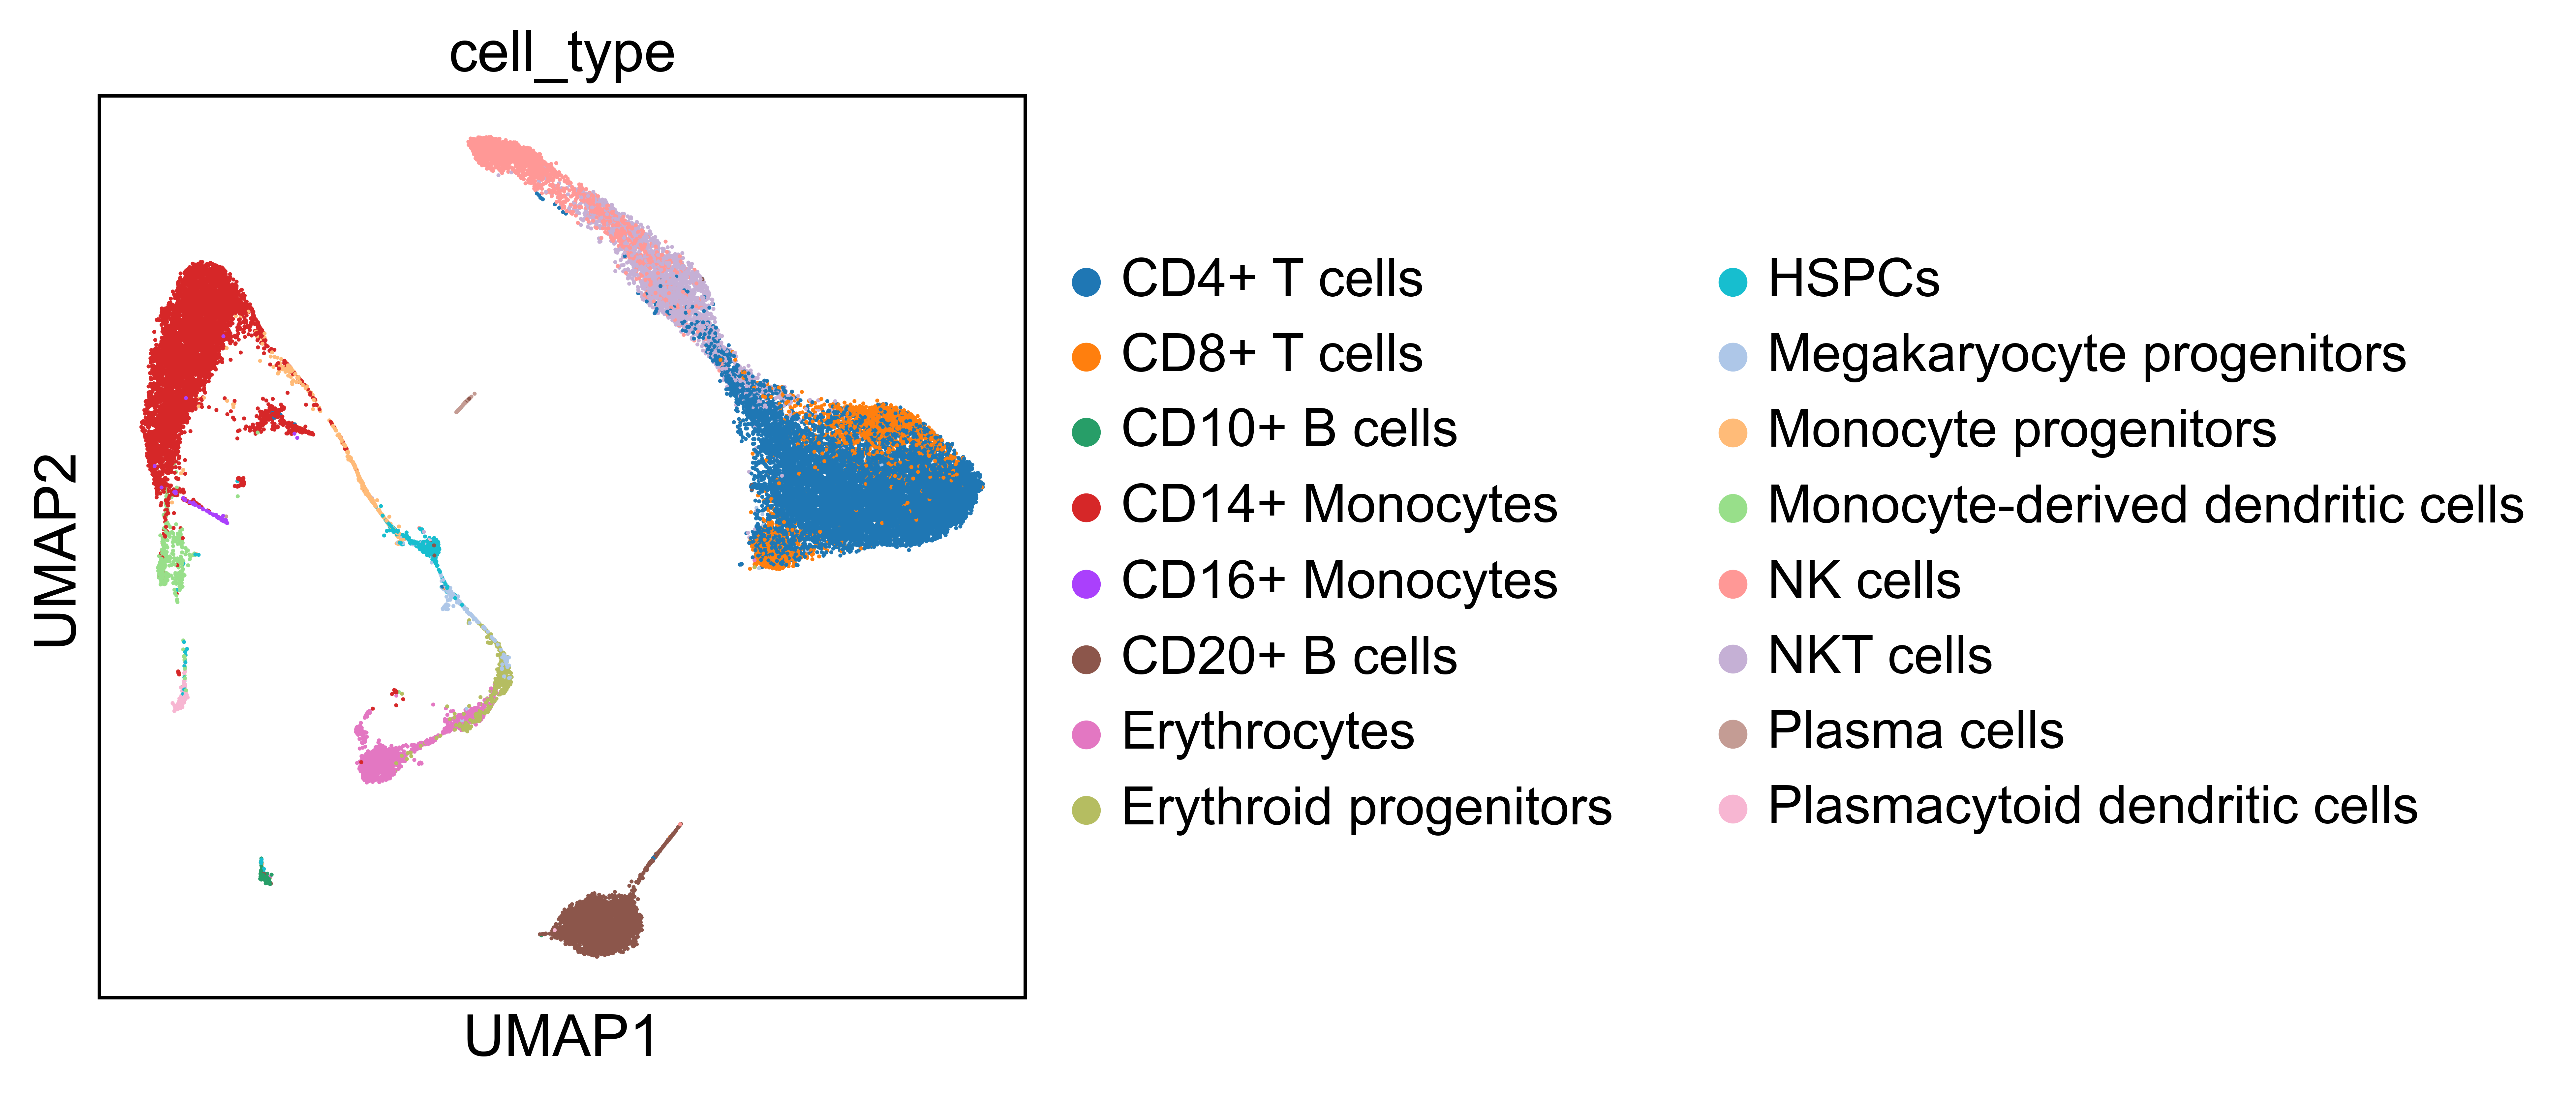

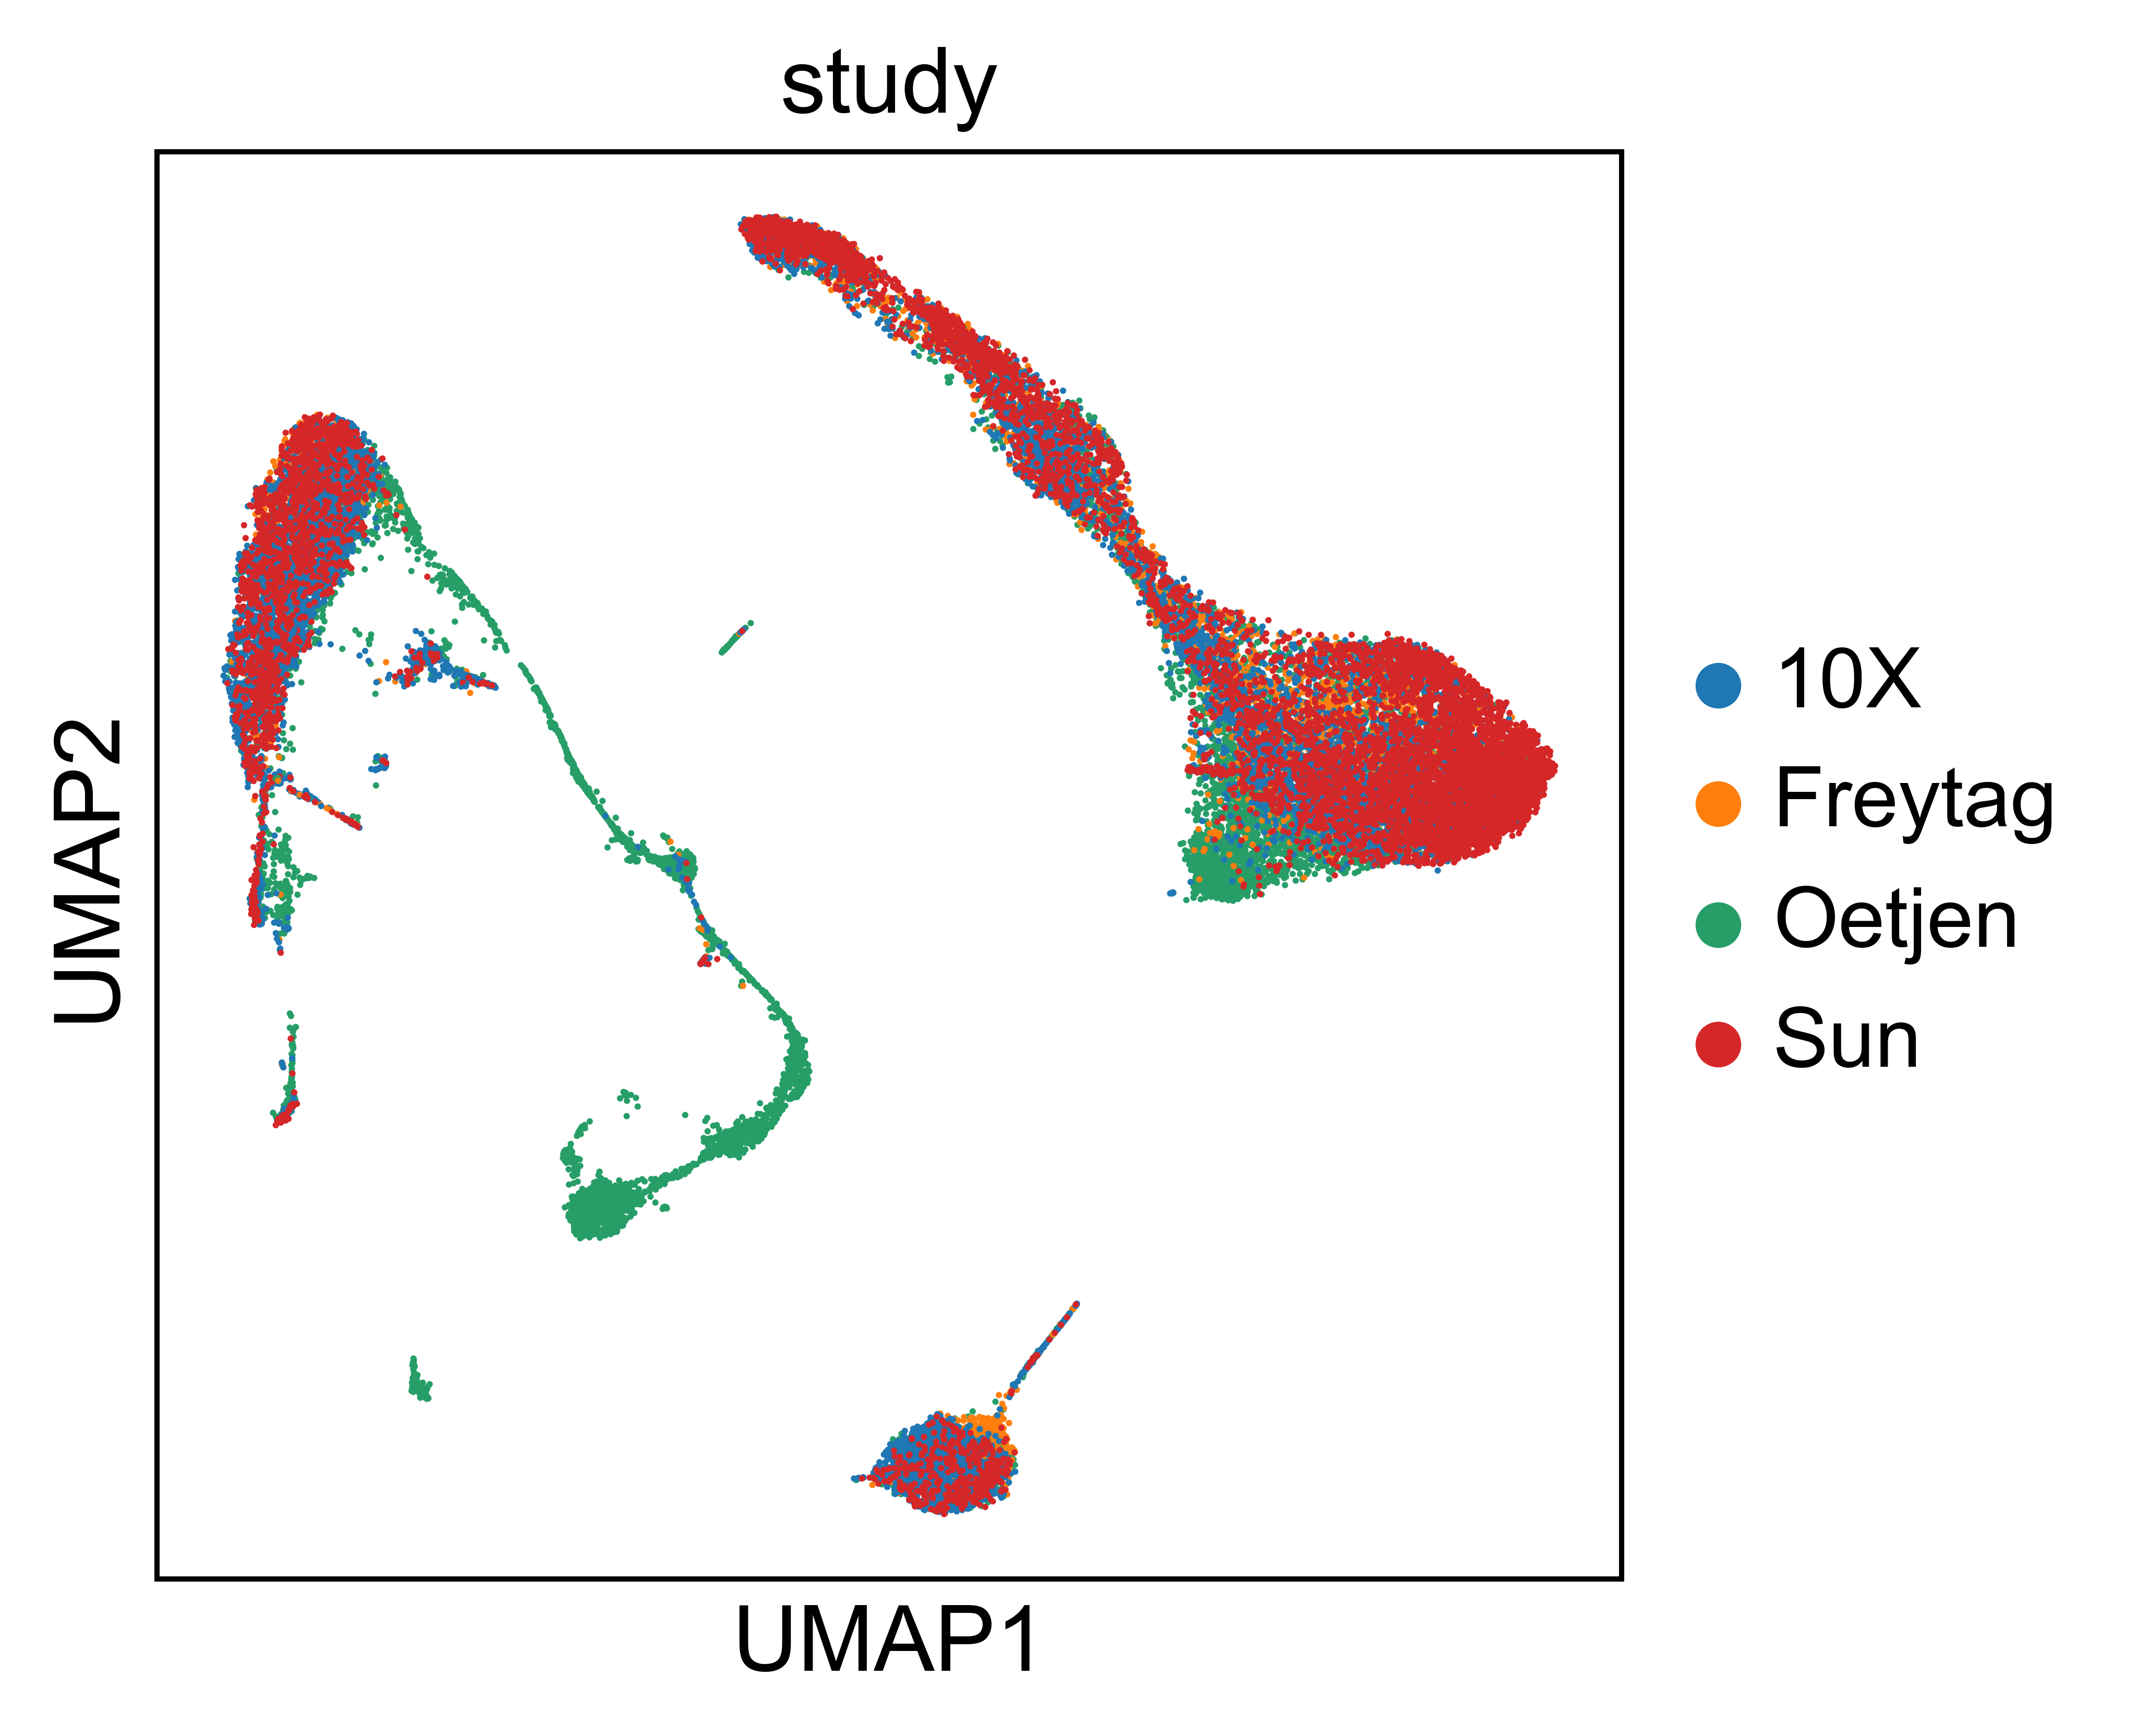

In [21]:
adata.obs['Annotation']=annotation
sc.set_figure_params(scanpy=True, dpi=450, dpi_save=450)
sc.pl.umap(adata, color=["Annotation"])#,save='Heart_ann.svg')
sc.pl.umap(adata, color=["cell_type"])#,save='Heart_author.svg')
sc.pl.umap(adata, color=["study"])#,save='Heart_study.svg')